In [10]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from sklearn import tree

from IPython.display import Image
import pydotplus
import six
import pydot
import os
import array

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn import tree
import pandas as pd
import seaborn as sns
from subprocess import call
from IPython.display import Image

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/diabetes.csv")
rf = RandomForestClassifier(n_estimators = 200)
x_train, x_test, y_train, y_test = train_test_split(df[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], df['Outcome'])
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test))

0.7916666666666666


In [10]:
i_tree = 0
for tree_in_forest in range(0,6):
    export_graphviz(rf.estimators_[tree_in_forest],out_file='tree.dot',
    feature_names=fn,
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1
Image(filename='tree0.png')

[Text(0.5, 1.0, 'Score as a function of estimators')]

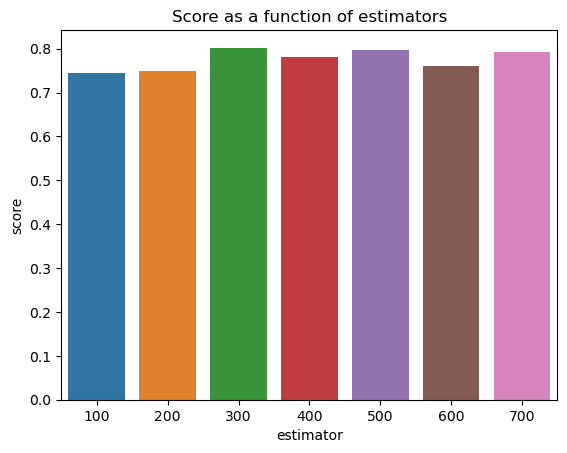

In [16]:
estimators = [100, 200, 300, 400, 500, 600, 700]
scores = []
for i in estimators:
    rf = RandomForestClassifier(n_estimators = i)
    x_train, x_test, y_train, y_test = train_test_split(df[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], df['Outcome'])
    rf.fit(x_train, y_train)
    scores.append(rf.score(x_test, y_test))
dat = {"estimator":estimators, "score":scores}
df_plot = pd.DataFrame(dat)
sns.barplot(data = df_plot, x = "estimator", y = "score").set(title="Score as a function of estimators")

In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


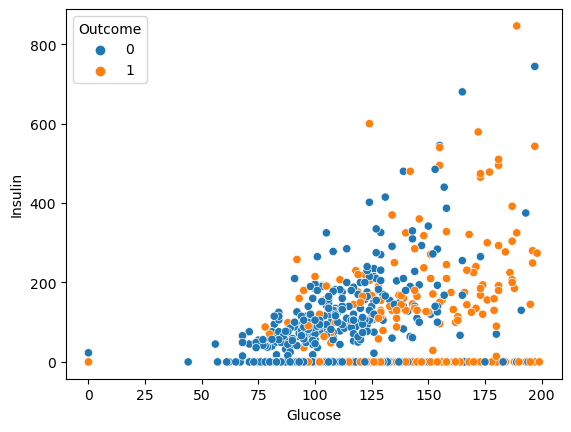

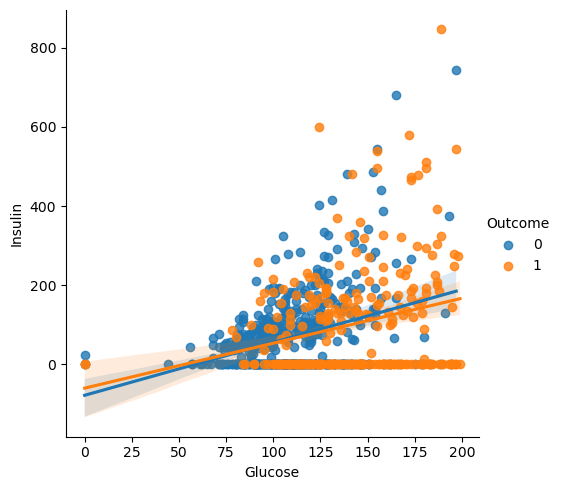

In [11]:
sns.scatterplot(data=df, x="Glucose", y="Insulin", hue="Outcome")
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

<Axes: xlabel='Glucose', ylabel='BMI'>

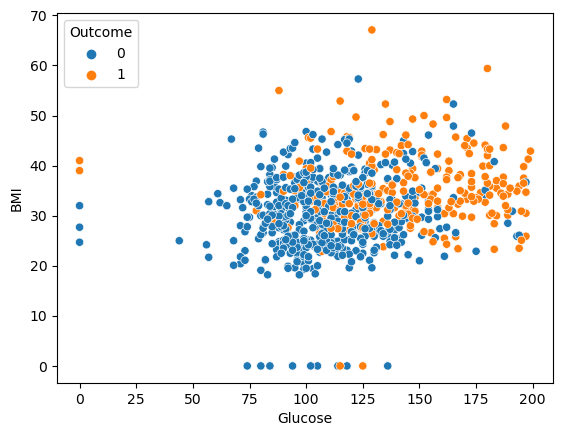

In [20]:
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Outcome")
sns.lmplot(data=df, x="Glucose", y="BMI", hue="Outcome")

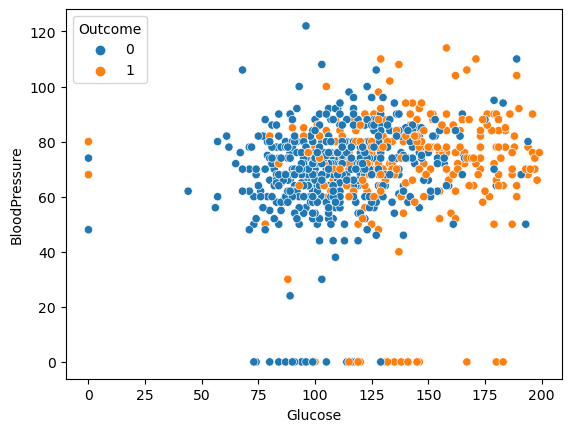

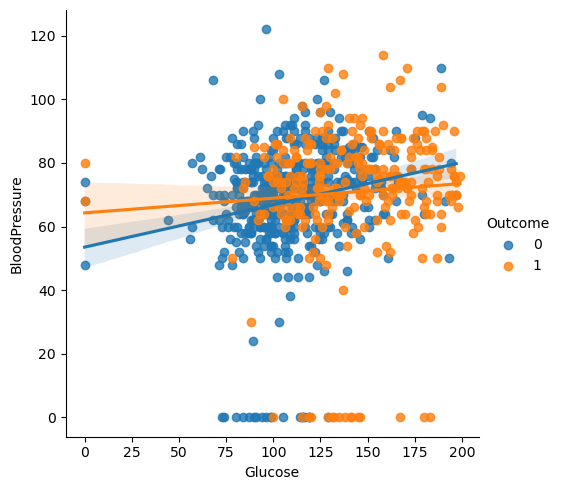

In [12]:
sns.scatterplot(data=df, x="Glucose", y="BloodPressure", hue="Outcome")
sns.lmplot(data=df, x="Glucose", y="BloodPressure", hue="Outcome")

In [4]:
knn = KNeighborsClassifier(n_neighbors = 5)
x_train, x_test, y_train, y_test = train_test_split(df[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], df['Outcome'])
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.703125


[Text(0.5, 1.0, 'Score as a function of estimators')]

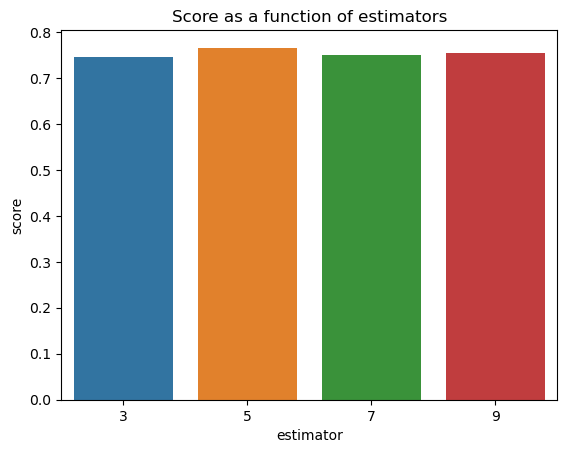

In [17]:
estimators = [3, 5, 7, 9]
scores = []
for i in estimators:
    knn = KNeighborsClassifier(n_neighbors = i)
    x_train, x_test, y_train, y_test = train_test_split(df[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], df['Outcome'])
    rf.fit(x_train, y_train)
    scores.append(rf.score(x_test, y_test))
dat = {"estimator":estimators, "score":scores}
df_plot = pd.DataFrame(dat)
sns.barplot(data = df_plot, x = "estimator", y = "score").set(title="Score as a function of estimators")